In [ ]:
# Uplode the file on google colab
from google.colab import files
uploaded = files.upload()

Saving case_time_series (1).csv to case_time_series (1).csv


In [ ]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# read the dataset
df = pd.read_csv("case_time_series (1).csv")
df.tail()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
529,12 July 2021,2021-07-12,30818,30904515,47544,30054587,2024,410225
530,13 July 2021,2021-07-13,40314,30944829,42436,30097023,625,410850
531,14 July 2021,2021-07-14,41759,30986588,39293,30136316,578,411428
532,15 July 2021,2021-07-15,39071,31025659,39827,30176143,544,411972
533,16 July 2021,2021-07-16,38115,31063774,43878,30220021,560,412532


In [ ]:
# Store the data in variables
x = np.array(df['Total Confirmed'])
y = np.array(df['Total Recovered'])
z = np.array(df['Total Deceased'])
N = 1370508600

In [ ]:
# Make the array of susceptible, Infected and Removed peoples
#inf_1 = np.array(x-y-z)
sus = np.array(N-x)[:-20]
inf = np.array(x-y-z)[:-20]
rec = np.array(y+z)[:-20]

In [ ]:
N

In [ ]:
# calculate the gamma of mean 10 days
days = 10
rec = rec[-days:]
inf = inf[-days:]
gamma = np.zeros(days)
for i in range(days-1):
  gamma[i] = (rec[i+1]-rec[i])/inf[i]
gamma = gamma.mean()
print(gamma)

0.0986087766085404


In [ ]:
# calculate the beta of mean 10 days
sus = sus[-days:]
inf = inf[-days:]
beta = np.zeros(days)
for i in range(days-1):
  beta[i] = -((sus[i+1] - sus[i])*N)/(sus[i]*inf[i])
beta = beta.mean()

In [ ]:
# calculate the R0 value 
r0 = beta/gamma
print(r0)

0.7112490154244899


In [ ]:
# Set variable for prediction days
p_days = 30

# Define the array to store the predictions
S = np.zeros(p_days)
I = np.zeros(p_days)
R = np.zeros(p_days)

# set the intial valuse of susciptible 
S[0] = sus[len(sus)-1]
I[0] = inf[len(inf)-1]
R[0] = rec[len(rec)-1]

In [ ]:
# Import the library to do integration
from scipy.integrate import odeint
t = np.linspace(1, p_days, p_days)

In [ ]:
# define the function Susciptibel Infected and Recovered cases
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [ ]:
# Calculate the present susciptible, infected and recoverd cases
S_1 = int(S[0])
I_1 = int(I[0])
R_1 = int(R[0])
y = S_1,I_1,R_1 
# Calcuate the cases using integarion method
ret = odeint(deriv, y, t, args=(N, beta, gamma))
S, I, R = ret.T

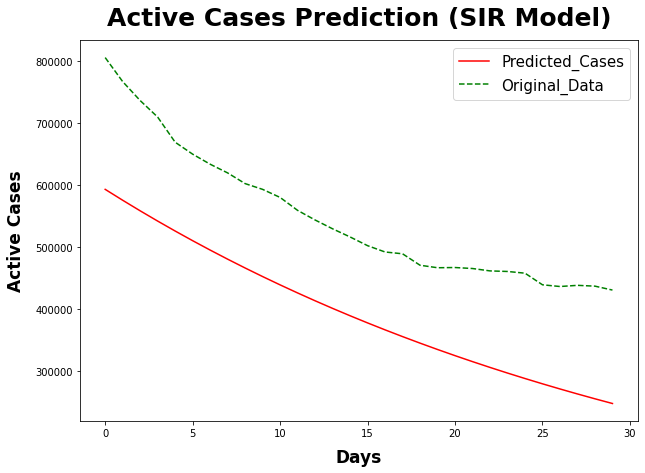

In [ ]:
# Visualising the Predictions of Decision tree regressor model
plt.figure(figsize = (10,7))
plt.title('Active Cases Prediction (SIR Model)', fontsize = 25, fontweight = 'bold', pad = 15)
plt.xlabel('Days', fontsize = 17, labelpad = 10, fontweight = 'bold')
plt.ylabel('Active Cases', fontsize = 17, labelpad = 10, fontweight = 'bold')
plt.plot(I,'-r')
plt.plot(inf_1[-p_days:], '--g')
plt.legend(['Predicted_Cases','Original_Data'], fontsize = 15 )

In [ ]:
from sklearn.metrics import r2_score
a = r2_score(I, inf_1[-p_days:])
print(a)

-1.2176378323479926
